**Image Classification with CNN**

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
print ("Number of datasets: ", len(tfds.list_builders()))
tfds.list_builders()

Number of datasets:  224


['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [5]:
print("x_train dimensions : ", x_train.shape)
print("x_test dimensions : ", x_test.shape)
print("y_train dimensions : ", y_train.shape)
print("y_test dimensions : ", y_test.shape)

x_train dimensions :  (50000, 32, 32, 3)
x_test dimensions :  (10000, 32, 32, 3)
y_train dimensions :  (50000, 1)
y_test dimensions :  (10000, 1)


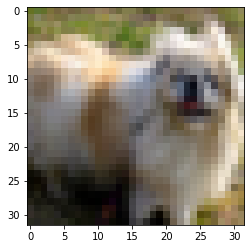

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[40])

**Preparing Data for Model Training**

***Creating Validation Dataset***

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.05, random_state = 0)

**Augmenting Data**

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator( rotation_range=15,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True
                             )

In [9]:
def normalize(data):
  data = data.astype("float32")
  data = data/255.0
  return data

In [10]:
x_train = normalize(x_train)
datagen.fit(x_train)
x_val = normalize(x_val)
datagen.fit(x_val)
x_test = normalize(x_test)

In [11]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

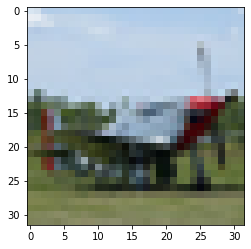

In [12]:
plt.imshow(x_train[40])

In [13]:
print("x_train dimensions : ", x_train.shape)
print("y_train dimensions : ", y_train.shape)
print("x_test dimensions : ", x_test.shape)
print("y_test dimensions : ", y_test.shape)
print("x_val dimensions : ", x_val.shape)
print("y_val dimensions : ", y_val.shape)

x_train dimensions :  (47500, 32, 32, 3)
y_train dimensions :  (47500, 10)
x_test dimensions :  (10000, 32, 32, 3)
y_test dimensions :  (10000, 10)
x_val dimensions :  (2500, 32, 32, 3)
y_val dimensions :  (2500, 10)


**Model Development**

In [14]:
def results(model):
  epoch = 20

  r = model.fit(x_train, y_train, batch_size = 32, epochs = epoch, validation_data = (x_val, y_val), verbose = 1)
  acc = model.evaluate(x_test, y_test)

  print("test set loss : ", acc[0])
  print("test set accuracy :", acc[1]*100)

  # Plot training and validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, r.history['accuracy'])
  plt.plot(epoch_range, r.history['val_accuracy'])
  plt.title('Classification Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()
  
  # Plot training & validation loss values
  plt.plot(epoch_range,r.history['loss'])
  plt.plot(epoch_range, r.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()

**Predict Function**

In [15]:
classes = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog','frog', 'horse','ship','truck']

def predict_class(filename, model):
  img = load_img(filename, target_size=(32, 32))
  plt.imshow(img)
  
  # convert to array
  # reshape into a single sample with 3 channels
  img = img_to_array(img)
  img = img.reshape(1,32,32,3)

  # prepare pixel data
  img = img.astype('float32')
  img = img/255.0

  #predicting the results
  result = model.predict(img)

  dict2 = {}
  for i in range(10):
    dict2[result[0][i]] = classes[i]

  res = result[0]
  res.sort()
  res = res[::-1]
  results = res[:3]

  print("Top predictions of these images are")
  for i in range(3):
    print("{} : {}".format(dict2[results[i]], (results[i]*100).round(2)))
  print('The image given as input is')

**Defining Models**

*A Model with 2 Convolutional Layers*

In [24]:
model_1 = Sequential(
    [
                      Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)),
                      Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
                      MaxPooling2D((2, 2)),
                      Flatten(),
                      Dense(128, activation = 'relu'),Dense(10, activation = 'softmax')
                      ]
                     )

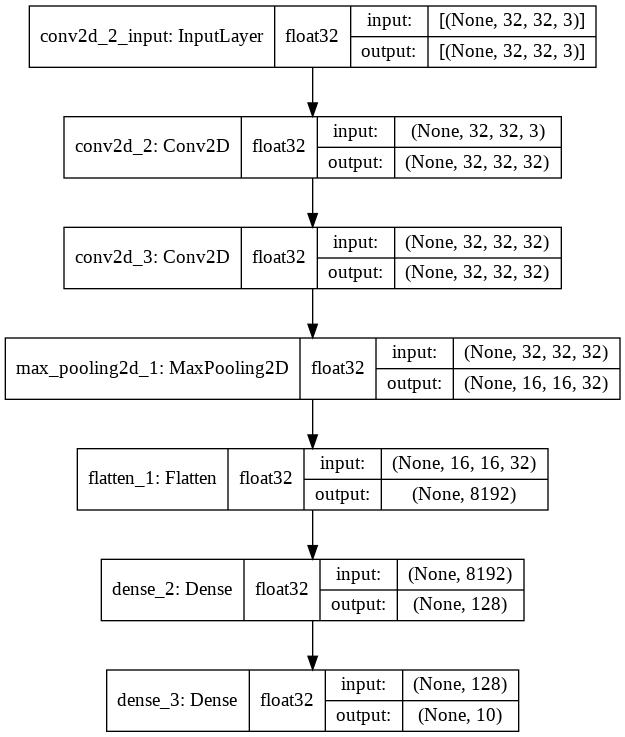

In [25]:
tf.keras.utils.plot_model(model_1, 'multilayer_model.png', show_shapes=True, show_dtype=True, show_layer_names=True)

In [26]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,060,138
Trainable params: 1,060,138
Non-trainable params: 0
____________________________________________

In [27]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model_1.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

Epoch 1/20
1485/1485 [==============================] - 6s 4ms/step - loss: 1.8790 - accuracy: 0.3300 - val_loss: 1.6858 - val_accuracy: 0.3988
Epoch 2/20
1485/1485 [==============================] - 5s 4ms/step - loss: 1.5546 - accuracy: 0.4499 - val_loss: 1.4527 - val_accuracy: 0.4724
Epoch 3/20
1485/1485 [==============================] - 5s 4ms/step - loss: 1.3517 - accuracy: 0.5192 - val_loss: 1.3127 - val_accuracy: 0.5272
Epoch 4/20
1485/1485 [==============================] - 5s 4ms/step - loss: 1.2230 - accuracy: 0.5686 - val_loss: 1.2105 - val_accuracy: 0.5704
Epoch 5/20
1485/1485 [==============================] - 5s 4ms/step - loss: 1.1262 - accuracy: 0.6029 - val_loss: 1.1587 - val_accuracy: 0.5888
Epoch 6/20
1485/1485 [==============================] - 5s 4ms/step - loss: 1.0448 - accuracy: 0.6323 - val_loss: 1.1075 - val_accuracy: 0.6044
Epoch 7/20
1485/1485 [==============================] - 5s 4ms/step - loss: 0.9687 - accuracy: 0.6623 - val_loss: 1.0199 - val_accuracy:

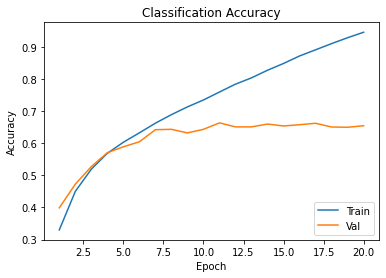

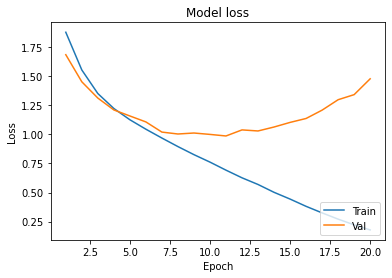

In [28]:
results(model_1)

Top predictions of these images are
airplane : 79.67
truck : 17.61
automobile : 2.5
The image given as input is


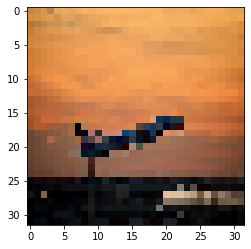

In [29]:
import urllib
resource = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/ANA_777-300_Taking_off_from_JFK.jpg/300px-ANA_777-300_Taking_off_from_JFK.jpg")
output = open("file01.jpg", "wb")
output.write(resource.read())
output.close()
predict_class("file01.jpg", model_1)

***Model_2 with 4 Convolutional Layers***

In [31]:
model_2 = Sequential(
    [
     Conv2D(32, (3, 3), activation = 'relu', padding = 'same',input_shape = (32, 32, 3)),
     Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
     MaxPooling2D((2, 2)),
     Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
     Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
     MaxPooling2D((2, 2)),
     Flatten(),
     Dense(128, activation = 'relu'),
     Dense(10, activation = 'softmax')
     ]
     )

In [33]:
opt = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)
model_2.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

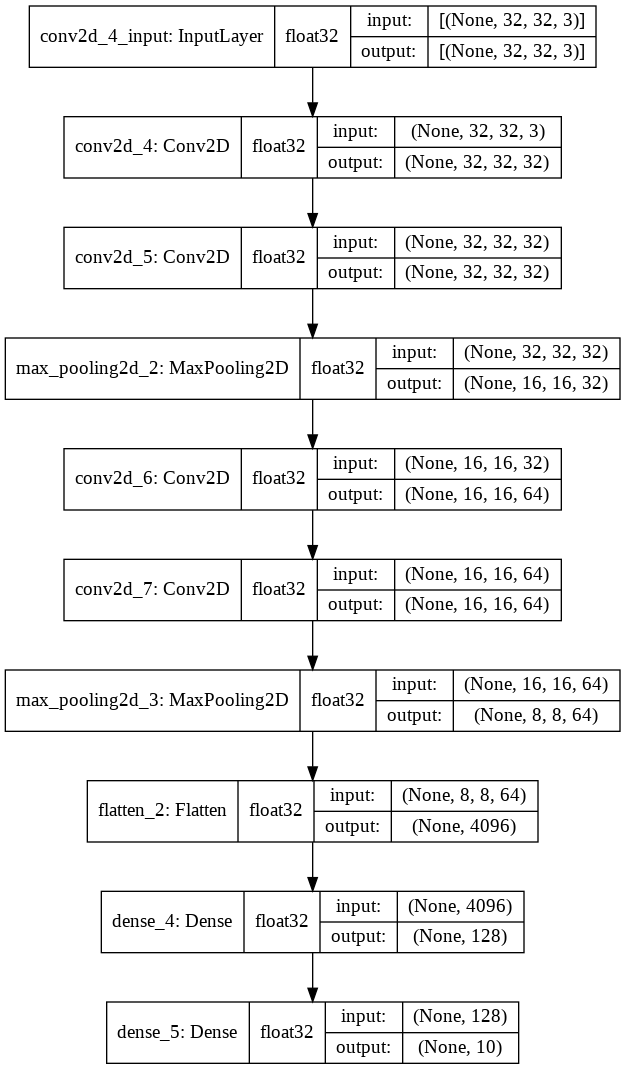

In [35]:
tf.keras.utils.plot_model(model_2, 'multilayer_model.png', show_shapes=True, show_dtype=True, show_layer_names=True)

In [36]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

Epoch 1/20
1485/1485 [==============================] - 8s 5ms/step - loss: 1.9292 - accuracy: 0.3029 - val_loss: 1.6267 - val_accuracy: 0.4164
Epoch 2/20
1485/1485 [==============================] - 7s 5ms/step - loss: 1.5163 - accuracy: 0.4580 - val_loss: 1.4300 - val_accuracy: 0.4884
Epoch 3/20
1485/1485 [==============================] - 7s 5ms/step - loss: 1.3527 - accuracy: 0.5180 - val_loss: 1.2769 - val_accuracy: 0.5432
Epoch 4/20
1485/1485 [==============================] - 7s 4ms/step - loss: 1.2356 - accuracy: 0.5599 - val_loss: 1.1649 - val_accuracy: 0.5756
Epoch 5/20
1485/1485 [==============================] - 7s 4ms/step - loss: 1.1334 - accuracy: 0.6006 - val_loss: 1.0909 - val_accuracy: 0.6176
Epoch 6/20
1485/1485 [==============================] - 7s 4ms/step - loss: 1.0410 - accuracy: 0.6321 - val_loss: 1.0489 - val_accuracy: 0.6236
Epoch 7/20
1485/1485 [==============================] - 7s 4ms/step - loss: 0.9570 - accuracy: 0.6652 - val_loss: 1.0461 - val_accuracy:

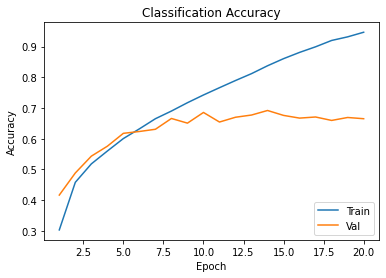

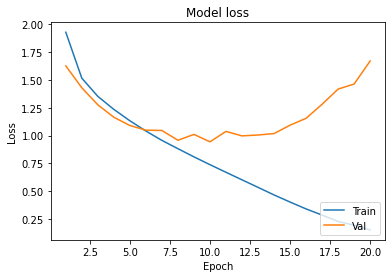

In [37]:
results(model_2)

Top predictions of these images are
ship : 98.6
deer : 1.39
airplane : 0.01
The image given as input is


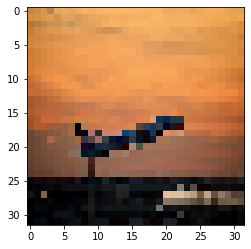

In [66]:
import urllib
resource = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/ANA_777-300_Taking_off_from_JFK.jpg/300px-ANA_777-300_Taking_off_from_JFK.jpg")
output = open("file02.jpg", "wb")
output.write(resource.read())
output.close()
predict_class("file02.jpg", model_2)

**Third Model : 6 Convolutional layers with 32, 64 and 128 filters respectively**

In [39]:
model_3 = Sequential(
    [
     Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)),
     Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
     MaxPooling2D((2, 2)),
     Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
     Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
     MaxPooling2D((2, 2)),
     Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
     Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
     MaxPooling2D((2, 2)),
     Flatten(),
     Dense(128, activation = 'relu'),
     Dense(10, activation = 'softmax')
     ]
     )

In [42]:
opt = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)
model_3.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

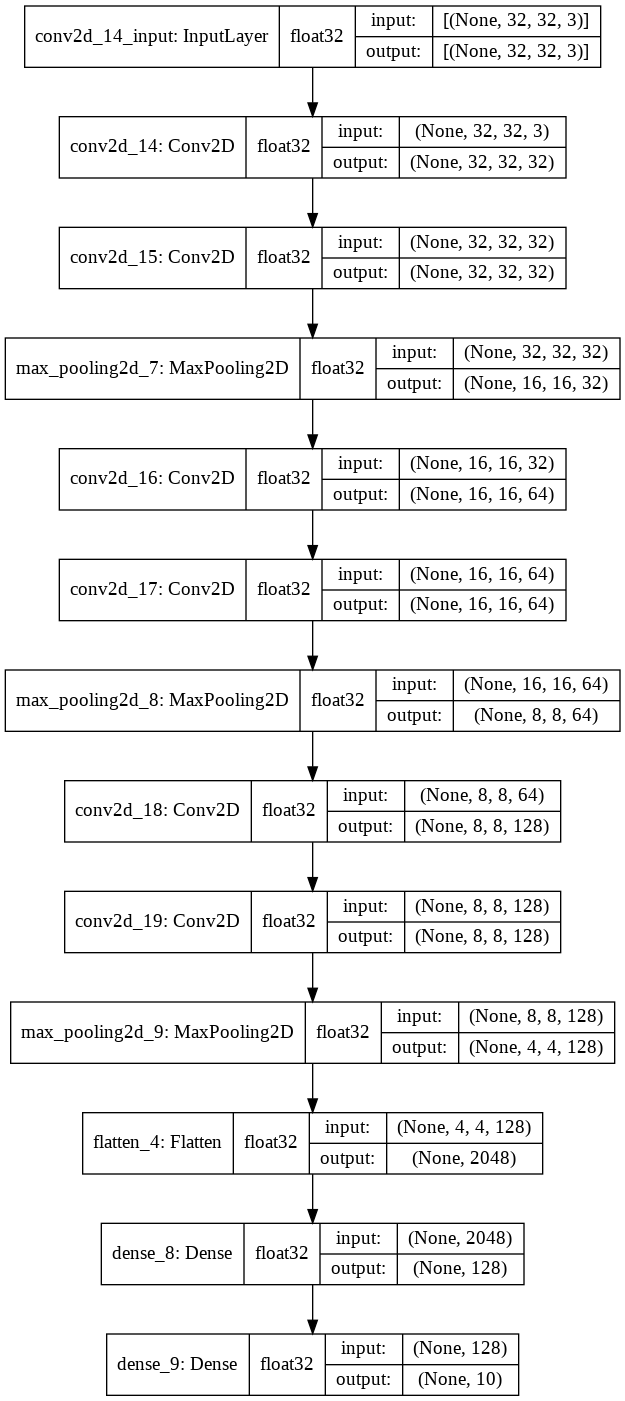

In [43]:
tf.keras.utils.plot_model(model_3, 'multilayer_model.png', show_shapes=True, show_dtype=True, show_layer_names=True)

In [44]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 128)        

Epoch 1/20
1485/1485 [==============================] - 9s 5ms/step - loss: 2.0412 - accuracy: 0.2466 - val_loss: 1.7322 - val_accuracy: 0.3880
Epoch 2/20
1485/1485 [==============================] - 8s 5ms/step - loss: 1.6028 - accuracy: 0.4234 - val_loss: 1.4723 - val_accuracy: 0.4612
Epoch 3/20
1485/1485 [==============================] - 8s 5ms/step - loss: 1.4034 - accuracy: 0.4980 - val_loss: 1.3178 - val_accuracy: 0.5224
Epoch 4/20
1485/1485 [==============================] - 8s 5ms/step - loss: 1.2562 - accuracy: 0.5532 - val_loss: 1.1907 - val_accuracy: 0.5616
Epoch 5/20
1485/1485 [==============================] - 8s 5ms/step - loss: 1.1400 - accuracy: 0.5958 - val_loss: 1.0963 - val_accuracy: 0.6156
Epoch 6/20
1485/1485 [==============================] - 8s 5ms/step - loss: 1.0269 - accuracy: 0.6397 - val_loss: 1.0344 - val_accuracy: 0.6408
Epoch 7/20
1485/1485 [==============================] - 7s 5ms/step - loss: 0.9406 - accuracy: 0.6735 - val_loss: 0.9854 - val_accuracy:

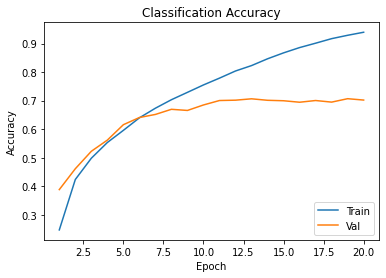

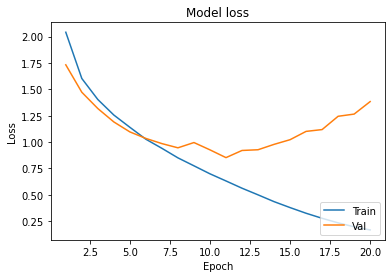

In [51]:
results(model_3)

Top predictions of these images are
ship : 78.15
airplane : 16.98
bird : 2.3
The image given as input is


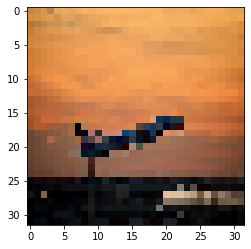

In [67]:
import urllib
resource = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/ANA_777-300_Taking_off_from_JFK.jpg/300px-ANA_777-300_Taking_off_from_JFK.jpg")
output = open("file03.jpg", "wb")
output.write(resource.read())
output.close()
predict_class("file03.jpg", model_3)

*Fourth Model : Addition of dropout layer*

In [52]:
model_4 = Sequential(
    [
     Conv2D(32, (3, 3), activation = 'relu', kernel_initializer ='he_uniform', padding = 'same', input_shape =(32, 32, 3)),
     Conv2D(32, (3, 3), activation = 'relu', kernel_initializer ='he_uniform', padding = 'same'),
     MaxPooling2D((2, 2)),
     Dropout(0.2),
     Conv2D(64, (3, 3), activation = 'relu', kernel_initializer ='he_uniform', padding = 'same'),
     Conv2D(64, (3, 3), activation = 'relu', kernel_initializer ='he_uniform', padding = 'same'),
     MaxPooling2D((2, 2)),
     Dropout(0.2),
     Conv2D(128, (3, 3), activation = 'relu', kernel_initializer ='he_uniform', padding = 'same'),
     Conv2D(128, (3, 3), activation = 'relu', kernel_initializer ='he_uniform', padding = 'same'),
     MaxPooling2D((2, 2)),
     Dropout(0.3),
     Flatten(),
     Dense(128, activation = 'relu'),
     Dense(10, activation = 'softmax')
     ]
     )

In [53]:
opt = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)
model_4.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

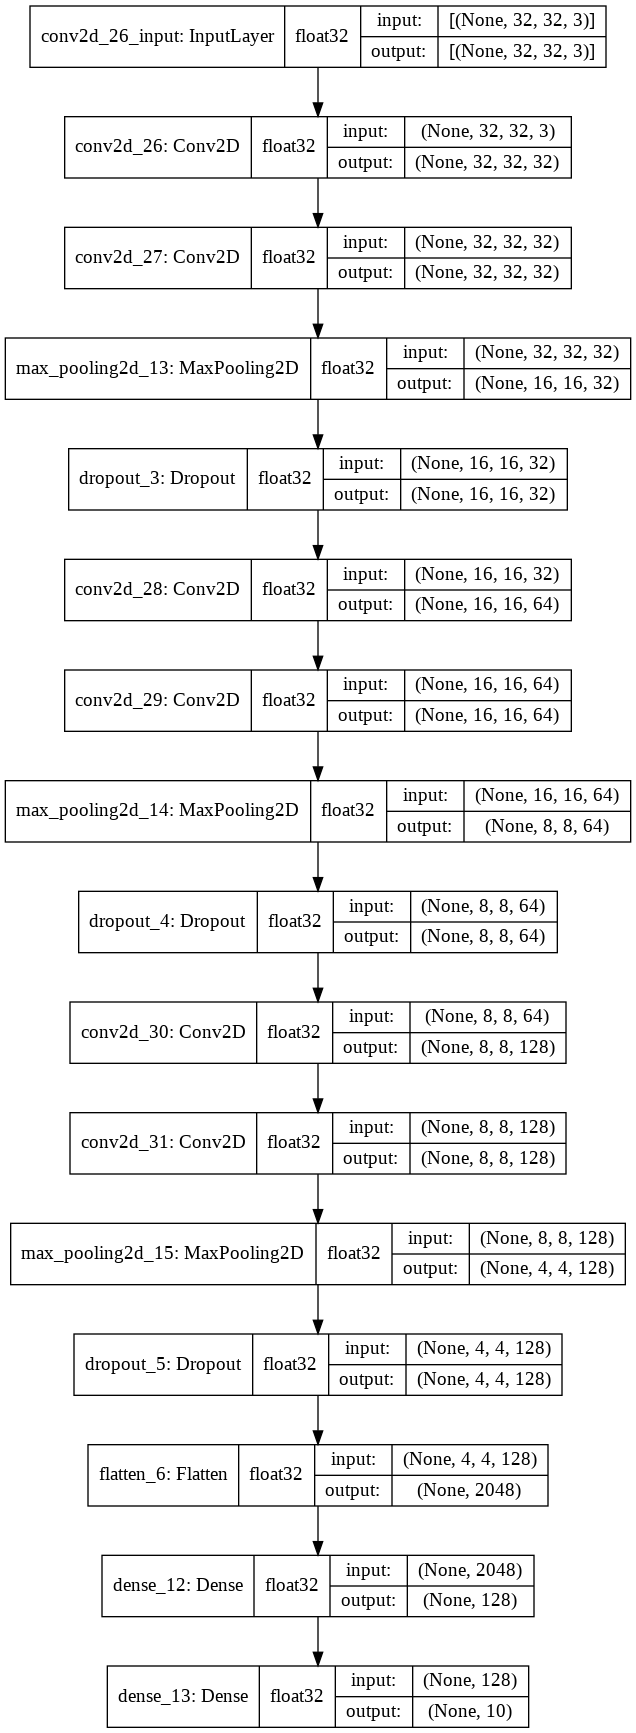

In [54]:
tf.keras.utils.plot_model(model_4, 'multilayer_model.png', show_shapes=True, show_dtype=True, show_layer_names=True)

In [55]:
model_4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)         

Epoch 1/20
1485/1485 [==============================] - 9s 6ms/step - loss: 1.8841 - accuracy: 0.3023 - val_loss: 1.5516 - val_accuracy: 0.4316
Epoch 2/20
1485/1485 [==============================] - 8s 5ms/step - loss: 1.5177 - accuracy: 0.4429 - val_loss: 1.3929 - val_accuracy: 0.5036
Epoch 3/20
1485/1485 [==============================] - 8s 5ms/step - loss: 1.3699 - accuracy: 0.4976 - val_loss: 1.1918 - val_accuracy: 0.5764
Epoch 4/20
1485/1485 [==============================] - 8s 5ms/step - loss: 1.2461 - accuracy: 0.5521 - val_loss: 1.1099 - val_accuracy: 0.5980
Epoch 5/20
1485/1485 [==============================] - 8s 5ms/step - loss: 1.1357 - accuracy: 0.5910 - val_loss: 1.0325 - val_accuracy: 0.6396
Epoch 6/20
1485/1485 [==============================] - 8s 5ms/step - loss: 1.0569 - accuracy: 0.6229 - val_loss: 0.9327 - val_accuracy: 0.6728
Epoch 7/20
1485/1485 [==============================] - 8s 5ms/step - loss: 0.9863 - accuracy: 0.6504 - val_loss: 0.8999 - val_accuracy:

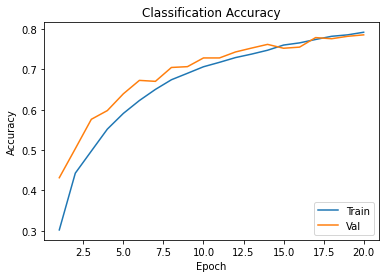

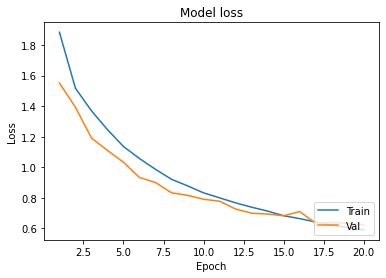

In [56]:
results(model_4)

Top predictions of these images are
airplane : 76.05
ship : 10.91
automobile : 8.79
The image given as input is


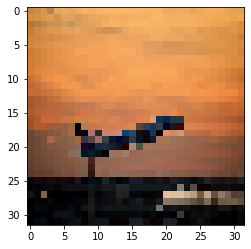

In [68]:
import urllib
resource = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/ANA_777-300_Taking_off_from_JFK.jpg/300px-ANA_777-300_Taking_off_from_JFK.jpg")
output = open("file04.jpg", "wb")
output.write(resource.read())
output.close()
predict_class("file04.jpg", model_4)

**Model 5**

In [57]:
weight_decay = 1e-4
model_5 = Sequential(
    [
     Conv2D(32, (3, 3), activation = 'relu', padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(weight_decay),input_shape = (32, 32, 3)),
     BatchNormalization(),
     Conv2D(32, (3, 3), activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), padding = 'same'),
     BatchNormalization(),
     MaxPooling2D((2, 2)),
     Dropout(0.2),
     Conv2D(64, (3, 3), activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), padding = 'same'),
     BatchNormalization(),
     Conv2D(64, (3, 3), activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), padding = 'same'),
     BatchNormalization(),
     MaxPooling2D((2, 2)),
     Dropout(0.3),
     Conv2D(128, (3, 3), activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), padding = 'same'),
     BatchNormalization(),
     Conv2D(128, (3, 3), activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), padding = 'same'),
     BatchNormalization(),
     MaxPooling2D((2, 2)),
     Dropout(0.3),
     Flatten(),
     Dense(128, activation = 'relu'),
     Dense(10, activation = 'softmax')
     ]
)

In [63]:
opt = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)
model_5.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

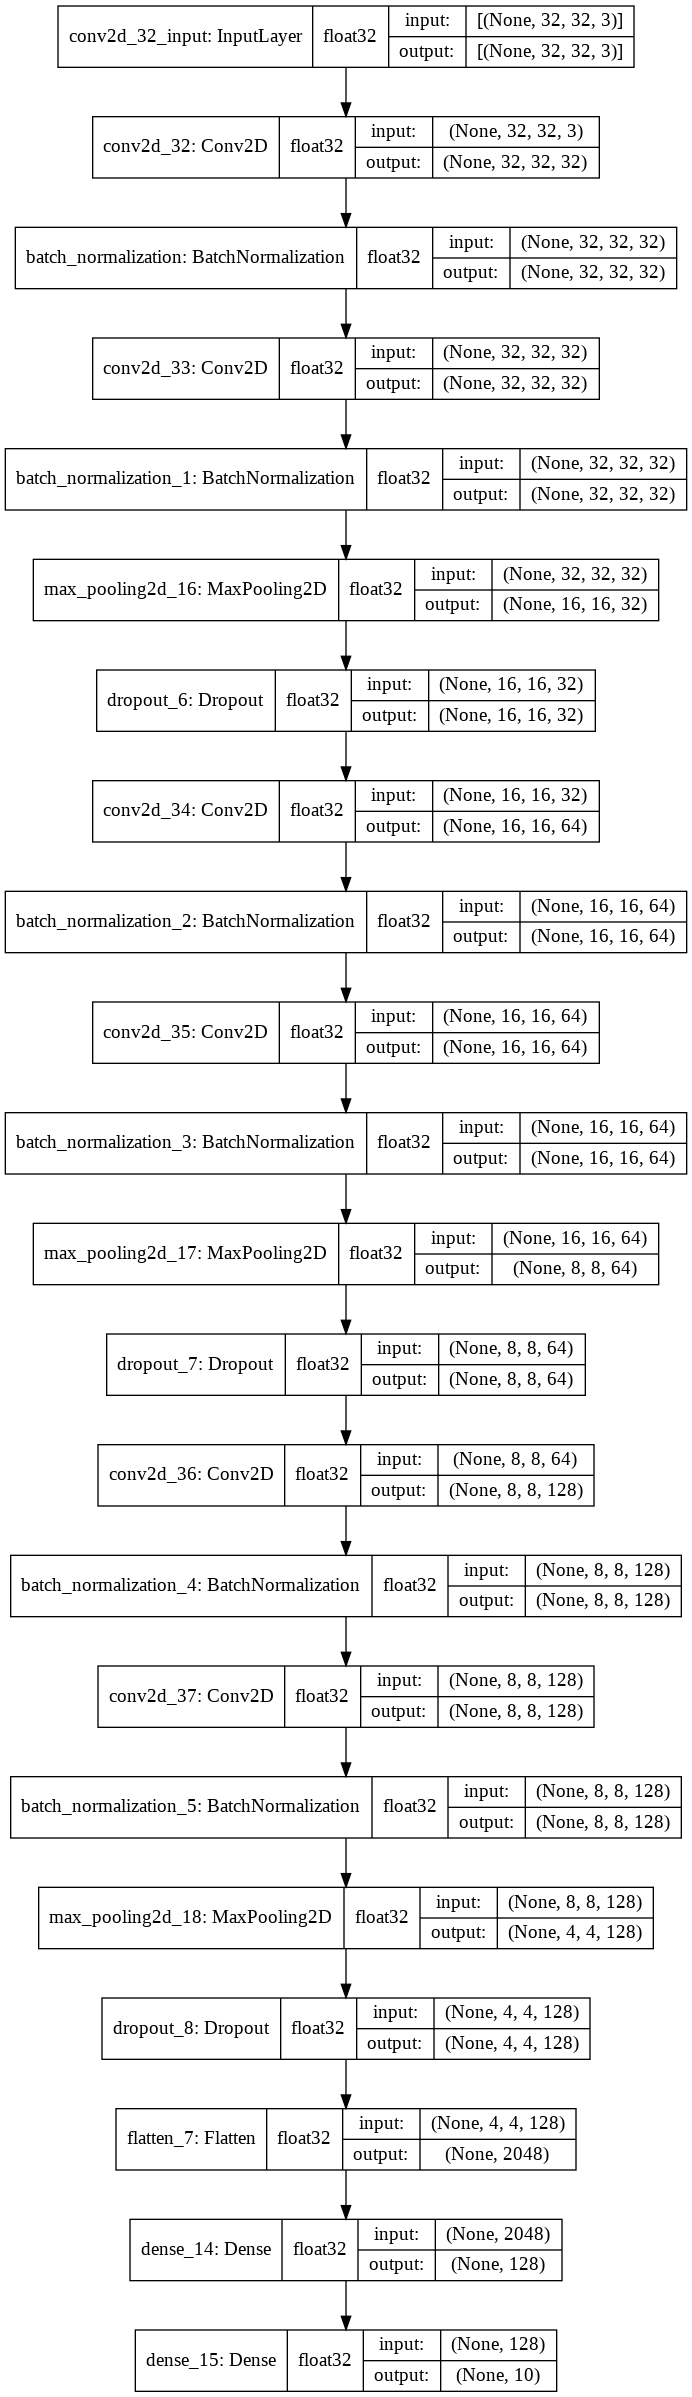

In [59]:
tf.keras.utils.plot_model(model_5, 'multilayer_model.png', show_shapes=True, show_dtype=True, show_layer_names=True)

In [60]:
model_5.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 64)       

Epoch 1/20
1485/1485 [==============================] - 10s 6ms/step - loss: 1.6246 - accuracy: 0.4266 - val_loss: 1.3497 - val_accuracy: 0.5184
Epoch 2/20
1485/1485 [==============================] - 9s 6ms/step - loss: 1.2267 - accuracy: 0.5747 - val_loss: 1.2323 - val_accuracy: 0.5860
Epoch 3/20
1485/1485 [==============================] - 9s 6ms/step - loss: 1.0384 - accuracy: 0.6435 - val_loss: 1.0947 - val_accuracy: 0.6364
Epoch 4/20
1485/1485 [==============================] - 9s 6ms/step - loss: 0.9317 - accuracy: 0.6825 - val_loss: 0.8433 - val_accuracy: 0.7136
Epoch 5/20
1485/1485 [==============================] - 9s 6ms/step - loss: 0.8631 - accuracy: 0.7072 - val_loss: 0.8679 - val_accuracy: 0.7096
Epoch 6/20
1485/1485 [==============================] - 9s 6ms/step - loss: 0.8033 - accuracy: 0.7296 - val_loss: 0.8425 - val_accuracy: 0.7120
Epoch 7/20
1485/1485 [==============================] - 9s 6ms/step - loss: 0.7550 - accuracy: 0.7465 - val_loss: 0.7690 - val_accuracy

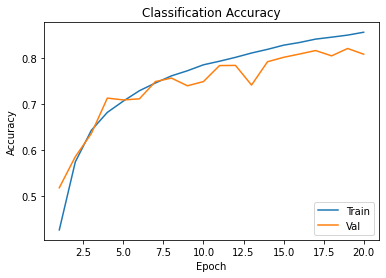

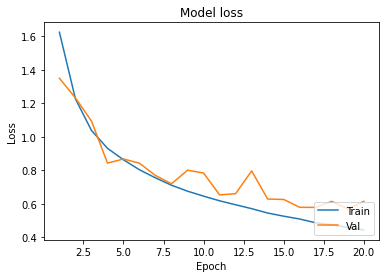

In [64]:
results(model_5)

Top predictions of these images are
airplane : 99.62
ship : 0.15
truck : 0.13
The image given as input is


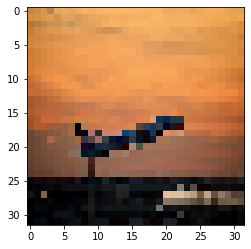

In [69]:
import urllib
resource = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/ANA_777-300_Taking_off_from_JFK.jpg/300px-ANA_777-300_Taking_off_from_JFK.jpg")
output = open("file05.jpg", "wb")
output.write(resource.read())
output.close()
predict_class("file05.jpg", model_5)

**Saving Model**

In [70]:
model_5.save("model_5.h5")

In [73]:
m = tf.keras.models.load_model("model_5.h5")

Top predictions of these images are
bird : 99.69
dog : 0.28
frog : 0.01
The image given as input is


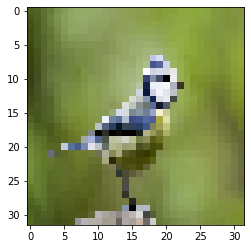

In [75]:
# unseen image 1
resource = urllib.request.urlopen("https://www.thespruce.com/thmb/rk3DGZLrlgEOprRfSwKqKopUzk4=/2121x1193/smart/filters:no_upscale()/Bird-GettyImages-582446599-58ec5c4d5f9b58ef7e24e7f4.jpg")
output = open("unknown01.jpg", "wb")
output.write(resource.read())
output.close()
predict_class("unknown01.jpg", m)

Top predictions of these images are
ship : 83.44
frog : 11.39
cat : 3.86
The image given as input is


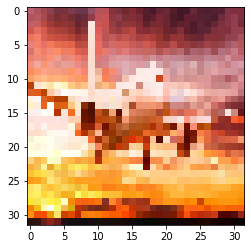

In [76]:
# unseen image 2
resource = urllib.request.urlopen("https://scx2.b-cdn.net/gfx/news/2019/toomanyairpl.jpg")
output = open("unknown02.jpg", "wb")
output.write(resource.read())
output.close()
predict_class("unknown02.jpg", m)